In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as sts

In [2]:
city_data_df = pd.read_csv(os.path.join('Resources', 'city_data.csv'))
ride_data_df = pd.read_csv(os.path.join('Resources', 'ride_data.csv'))

In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
city_data_df.groupby(['type']).count()[['city']]

,city
type,
Rural,18
Suburban,36
Urban,66


In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city', 'city'], how='left')

In [14]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Creates Data Frames for Each Type of City

In [15]:
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [16]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


### Cities Count for each City Type

In [17]:
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

### Fare City Average per City Type

In [18]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

### Drivers Average per City Type

In [19]:
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

### Urban Bubble Chart

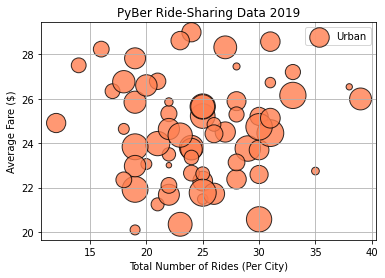

In [20]:
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color='coral',
    edgecolors='black', linewidth=1, alpha=0.8, label='Urban')
plt.title('PyBer Ride-Sharing Data 2019')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

### Suburban Bubble Chart

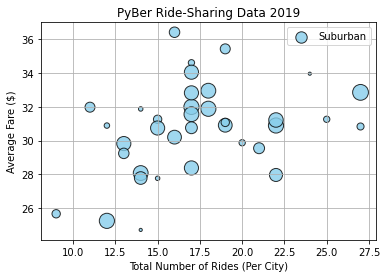

In [21]:
plt.scatter(suburban_ride_count, suburban_avg_fare, label='Suburban',
    s=10*suburban_driver_count, color='skyblue', edgecolor='black', linewidth=1, alpha=0.8)
plt.title('PyBer Ride-Sharing Data 2019')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

### Rural Buble Chart

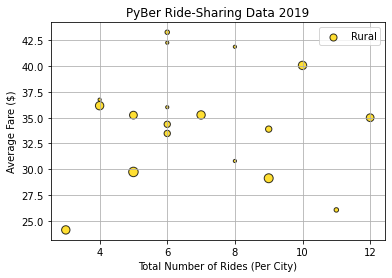

In [22]:
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, label='Rural',
    color='gold', alpha=0.8, linewidth=1, edgecolor='black')
plt.title('PyBer Ride-Sharing Data 2019')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

### Combine all Bubble Charts into One

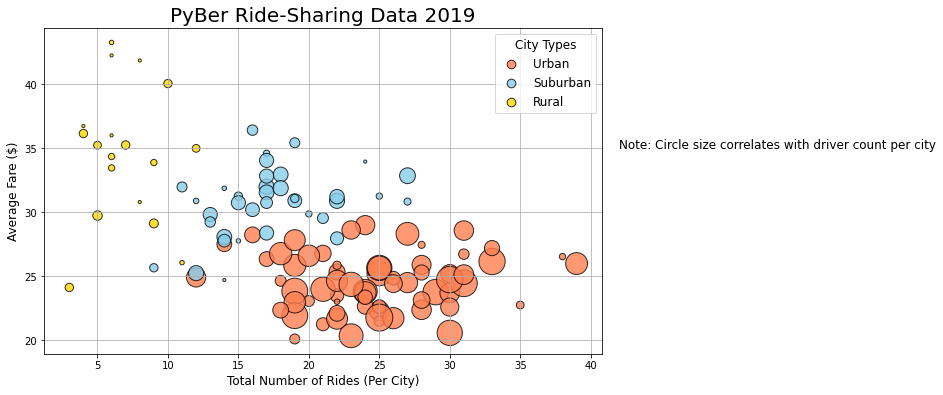

In [23]:
plt.subplots(figsize=(10,6))

# Urban
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color='coral',
    edgecolors='black', linewidth=1, alpha=0.8, label='Urban')

# Suburban
plt.scatter(suburban_ride_count, suburban_avg_fare, label='Suburban',
    s=10*suburban_driver_count, color='skyblue', edgecolor='black', linewidth=1, alpha=0.8)

#Rural
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, label='Rural',
    color='gold', alpha=0.8, linewidth=1, edgecolor='black')

# Incorporate the other graph properties
plt.title('PyBer Ride-Sharing Data 2019', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)

# Create a Legend
lgnd = plt.legend(fontsize=12, title='City Types', mode='Expanded', loc='best', scatterpoints=1)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42, 35, 'Note: Circle size correlates with driver count per city', fontsize=12)

plt.grid()
plt.savefig('analysis/Fig1.png')
plt.show()

### Statistics

In [24]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [25]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [26]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [27]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [28]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [29]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [30]:
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [31]:
urban_ride_count.median()

24.0

In [32]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [33]:
suburban_ride_count.mode()

0    17
dtype: int64

In [34]:
np.median(urban_ride_count)

24.0

In [35]:
np.mean(urban_ride_count)

24.62121212121212

In [36]:
sts.mode(urban_ride_count)

ModeResult(mode=array([22], dtype=int64), count=array([7]))

In [37]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [38]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [39]:
urban_fares = urban_cities_df['fare']
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [40]:
np.mean(urban_fares)

24.52577230769236

In [41]:
np.median(urban_fares)

24.64

In [42]:
sts.mode(urban_fares)

ModeResult(mode=array([22.86]), count=array([5]))

In [43]:
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [44]:
np.mean(urban_fares), np.mean(suburban_fares), np.mean(rural_fares)

(24.52577230769236, 30.97012800000002, 34.623440000000016)

In [45]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [46]:
print(round(np.mean(urban_drivers), 1), round(np.mean(suburban_drivers), 1), round(np.mean(rural_drivers)),1)
print(np.median(urban_drivers), np.median(suburban_drivers), np.median(rural_drivers))
sts.mode(urban_drivers), sts.mode(suburban_drivers), sts.mode(rural_drivers)

36.7 13.7 4 1
37.0 16.0 4.0


(ModeResult(mode=array([39], dtype=int64), count=array([86])),
 ModeResult(mode=array([20], dtype=int64), count=array([79])),
 ModeResult(mode=array([1], dtype=int64), count=array([32])))

### Whisker and Box Plot

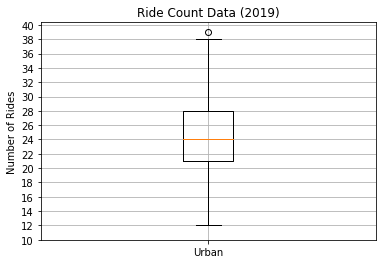

In [57]:
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=['Urban'])
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, 2))

plt.grid()
plt.show()

In [58]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

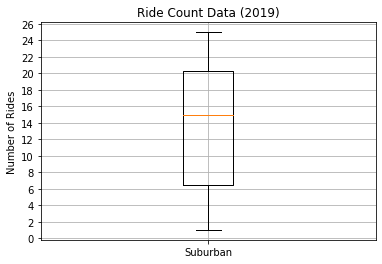

In [65]:
fig, ax = plt.subplots()
ax.boxplot(suburban_driver_count, labels=['Suburban'])
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 27, 2))

plt.grid()
plt.show()

In [66]:
suburban_driver_count.describe()

count    36.000000
mean     13.611111
std       8.022389
min       1.000000
25%       6.500000
50%      15.000000
75%      20.250000
max      25.000000
Name: driver_count, dtype: float64

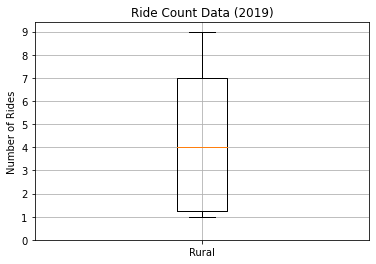

In [76]:
fig, ax = plt.subplots()
ax.boxplot(rural_driver_count, labels=['Rural'])
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 10, 1))

plt.grid()
plt.show()

In [70]:
urban_driver_count.describe()

count    66.000000
mean     36.439394
std      19.827819
min       3.000000
25%      22.000000
50%      37.000000
75%      49.750000
max      73.000000
Name: driver_count, dtype: float64

### Combine 3 Whisker and Box PLots into One Chart

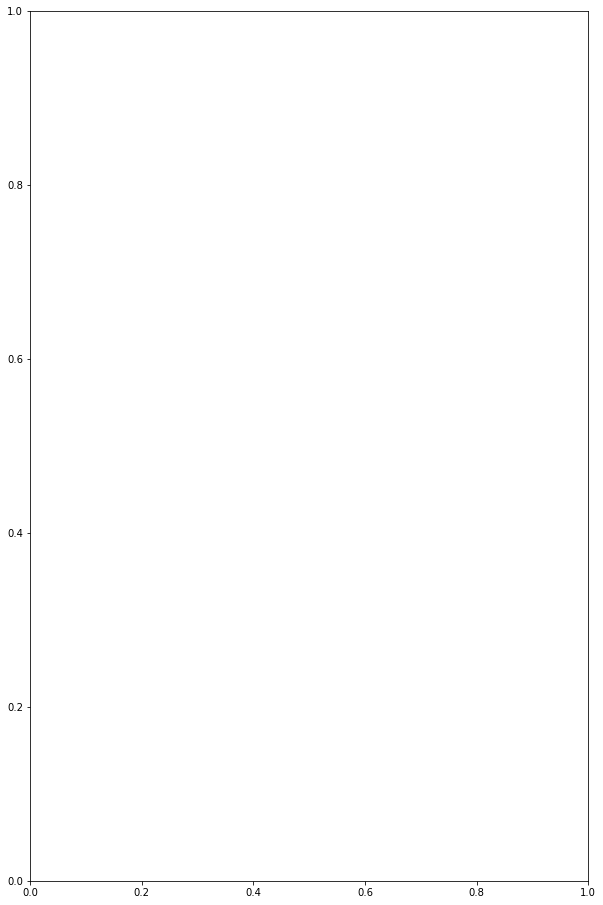

In [77]:
fig, ax = plt.subplots(figsize=(10, 16))
x_labels=['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]




